In [ ]:
# Code to read csv file into Colaboratory:
import os
import os.path
import numpy as np
import time
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import PIL
import PIL.Image
import glob
import shutil
import pickle

## tf/keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.constraints import maxnorm
from keras import optimizers
import keras.backend as K
from keras.callbacks import EarlyStopping
#from keras.wrappers.scikit_learn import KerasRegressor
from keras.applications.vgg16 import VGG16

from keras.models import Sequential
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers.convolutional import Convolution2D, AveragePooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from multiprocessing import Pool
from fastai.vision import *
from fastai.widgets import *
print('TensorFlow version')
print(tf.__version__)
%matplotlib inline
np.random.seed(42)

TensorFlow version
2.3.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
path = Path('drive/My Drive')

### Get the train/test images

In [ ]:
path_1t = 'drive/My Drive/google_image_class/train/class_1/'
path_2t = 'drive/My Drive/google_image_class/train/class_2/'
path_3t = 'drive/My Drive/google_image_class/train/class_3/'
path_1s = 'drive/My Drive/google_image_class/test/class_1/'
path_2s = 'drive/My Drive/google_image_class/test/class_2/' 
path_3s = 'drive/My Drive/google_image_class/test/class_3/'

In [ ]:
# train set
path_train = [] # the path for all training examples
label_train = [] # the label for all training examples

class_1_files = os.listdir(path_1t)
label_train += [[1, 0, 0]] * len(class_1_files)
path_train += [path_1t + i for i in class_1_files]

class_2_files = os.listdir(path_2t)
label_train += [[0, 1, 0]] * len(class_2_files)
path_train += [path_2t + i for i in class_2_files]

class_3_files = os.listdir(path_3t)
label_train += [[0, 0, 1]] * len(class_3_files)
path_train += [path_3t + i for i in class_3_files]

In [ ]:
# test set
path_test = []
label_test = []

class_1_files = os.listdir(path_1s)
label_test += [[1, 0, 0]] * len(class_1_files)
path_test += [path_1s + i for i in class_1_files]
 
class_2_files = os.listdir(path_2s)
label_test += [[0, 1, 0]] * len(class_2_files)
path_test += [path_2s + i for i in class_2_files]

class_3_files = os.listdir(path_3s)
label_test += [[0, 0, 1]] * len(class_3_files)
path_test += [path_3s + i for i in class_3_files]

In [ ]:
#IMG_DIM = (400, 400) # image size
IMG_DIM = (256,256) # reduce image size

t1=time.time()
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in path_train]
train_imgs = np.array(train_imgs)
train_labels = np.array(label_train)#

test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in path_test]
test_imgs = np.array(test_imgs)
test_labels = np.array(label_test)#
t2=time.time()

print(t2-t1)
print('Train dataset shape:', train_imgs.shape) 
print('Test dataset shape:', test_imgs.shape)

197.55216526985168
Train dataset shape: (570, 256, 256, 3)
Test dataset shape: (144, 256, 256, 3)


In [ ]:
train_imgs_scaled = train_imgs.astype('float32')
test_imgs_scaled  = test_imgs.astype('float32')
train_imgs_scaled /= 255  # scale image pixel to 255
test_imgs_scaled /= 255 # scale image pixel to 255

low nightlight intensity
[1 0 0]
(256, 256, 3)


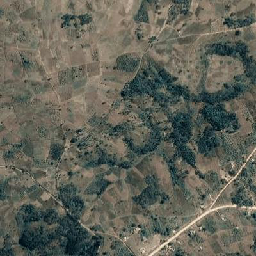

In [ ]:
print('low nightlight intensity')
print(train_labels[30])
print(train_imgs[30].shape)
array_to_img(train_imgs[30])

low nightlight intensity
[1 0 0]
(256, 256, 3)


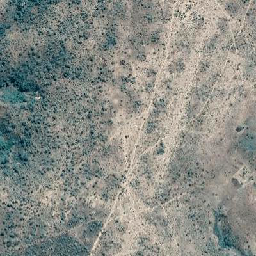

In [ ]:
print('low nightlight intensity')
print(train_labels[50])
print(train_imgs[50].shape)
array_to_img(train_imgs[50])

low nightlight intensity
[1 0 0]
(256, 256, 3)


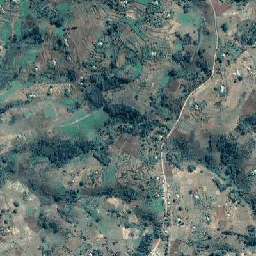

In [ ]:
print('low nightlight intensity')
print(train_labels[120])
print(train_imgs[120].shape)
array_to_img(train_imgs[120])

medium nightlight intensity
[0 1 0]
(256, 256, 3)


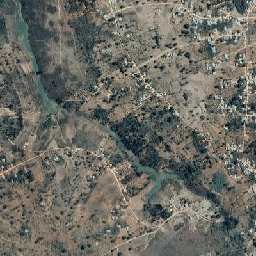

In [ ]:
print('medium nightlight intensity')
print(train_labels[360])
print(train_imgs[360].shape)
array_to_img(train_imgs[360])

medium nightlight intensity
[0 1 0]
(256, 256, 3)


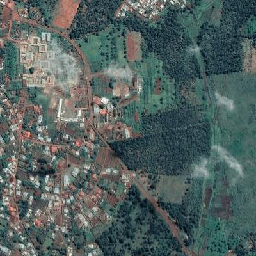

In [ ]:
print('medium nightlight intensity')
print(train_labels[260])
print(train_imgs[260].shape)
array_to_img(train_imgs[260])

medium nightlight intensity
[0 1 0]
(256, 256, 3)


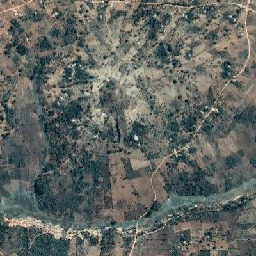

In [ ]:
print('medium nightlight intensity')
print(train_labels[290])
print(train_imgs[290].shape)
array_to_img(train_imgs[290])

high nightlight intensity
[0 0 1]
(256, 256, 3)


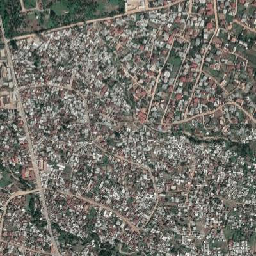

In [ ]:
print('high nightlight intensity')
print(train_labels[-20])
print(train_imgs[-20].shape)
array_to_img(train_imgs[-20])

high nightlight intensity
[0 0 1]
(256, 256, 3)


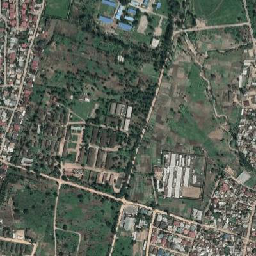

In [ ]:
print('high nightlight intensity')
print(train_labels[-50])
print(train_imgs[-50].shape)
array_to_img(train_imgs[-50])

high nightlight intensity
[0 0 1]
(256, 256, 3)


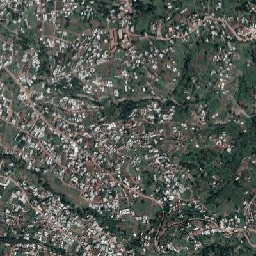

In [ ]:
print('high nightlight intensity')
print(train_labels[-110])
print(train_imgs[-110].shape)
array_to_img(train_imgs[-110])

### Model: 
#### 1. CNN model (similar to LeNet-5)

In [1]:
batch_size = 30
epochs = 100
input_shape = (256,256, 3)
np.random.seed(42)

NameError: ignored

In [2]:
# simple CNN models (LeNet-5)
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()
# first layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))

# 2nd layer, with pooling and dropout
model.add(Conv2D(64, kernel_size=(3, 3),kernel_regularizer = 'l2', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
# dense hidden layer, with dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),#'adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1016064)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               130056320 
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [3]:
cnn_model=model
history = cnn_model.fit(x=train_imgs_scaled, y=train_labels,
                    validation_data=(test_imgs_scaled, test_labels),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

NameError: ignored

In [ ]:
def plot_performance():
  '''
  metrics plot for model performance
  '''
  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.5, 4))
  plt.rcParams.update({'font.size': 16})
  #t = f.suptitle(title, fontsize=16)
  f.subplots_adjust(top=0.85, wspace=0.3)

  epoch_list = list(range(1,101))
  plt.rcParams.update({'font.size': 16})
  ax1.plot(epoch_list, history.history['accuracy'], label='Train')
  ax1.plot(epoch_list, history.history['val_accuracy'], label='Test')
  ax1.set_xticks(np.arange(0, 101, 20))
  ax1.set_ylabel('Accuracy')
  ax1.set_xlabel('Epoch')
  #ax1.set_title('Accuracy')
  l1 = ax1.legend(loc="best")

  ax2.plot(epoch_list, history.history['loss'], label='Train')
  ax2.plot(epoch_list, history.history['val_loss'], label='Test')
  ax2.set_xticks(np.arange(0, 101, 20))
  ax2.set_ylabel('Loss')
  ax2.set_xlabel('Epoch')
  #ax2.set_title('Loss')
  l2 = ax2.legend(loc="best")
  f.tight_layout()

In [ ]:
# CNN model
print('Basic CNN Model')
plot_performance()

In [ ]:
cnn_model.save('CNN_model.h5')

#### CNN Model with Image Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0, rotation_range=45,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0, 
                                   horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
img_id = 461
plt.rcParams.update({'font.size': 12})
img_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
img_example = [next(img_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in img_example])
l = [ax[i].imshow(img_example[i][0][0]) for i in range(0,5)]

In [ ]:
train_generator = train_datagen.flow(train_imgs, train_labels, batch_size=30)
test_generator = test_datagen.flow(test_imgs, test_labels, batch_size=30)
input_shape = (256, 256, 3)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()
# first layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
# 2nd layer, with pooling and dropout

model.add(Conv2D(64, kernel_size=(3, 3),kernel_regularizer = 'l2', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 3nd layer, with pooling and dropout
model.add(Conv2D(64, kernel_size=(3, 3),kernel_regularizer = 'l2', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
# dense hidden layer, with dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),#'adam',
              metrics=['accuracy'])

model.summary() 

In [ ]:
model_cnn_aug = model
history = model_cnn_aug.fit_generator(train_generator, steps_per_epoch=10, epochs=100,
                              validation_data=test_generator,# validation_steps=50, 
                              verbose=1) 

In [ ]:
# CNN model
print('CNN Model with Image Augmentation')
plot_performance()

In [ ]:
model_cnn_aug.save('CNN_model_augemnt.h5')

#### Use Pre-trained CNN Model (VGG16) to extract features

In [ ]:
from keras.applications import vgg16
from keras.models import Model
import keras

input_shape = (256, 256, 3)
vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output #use last layer
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False
    
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

In [ ]:
#bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
bottleneck_feature_example = vgg.predict(train_imgs_scaled[303:304])
print(bottleneck_feature_example.shape)
plt.rcParams.update({'font.size': 0})
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [ ]:
plt.imshow(train_imgs_scaled[303])

In [ ]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
test_features_vgg = get_bottleneck_features(vgg_model, test_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', test_features_vgg.shape)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1] # use VGG model as feature extraction

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),#'adam',
              metrics=['accuracy'])

model.summary()

In [ ]:
# use VGG model as feature extraction
model_vgg = model
history = model.fit(x=train_features_vgg, y=train_labels,
                    validation_data=(test_features_vgg, test_labels),
                    batch_size=30,
                    epochs=100,
                    verbose=1)

In [ ]:
print('Pre-trained CNN model (VGG) as a Feature Extractor')
plot_performance()

In [ ]:
model_vgg.save('VGG_model.h5')

#### Pre-trained CNN model as a Feature Extractor with Image Augmentation
- VGG16

In [ ]:
# augmentation
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0, rotation_range=45,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0, 
                                   horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels, batch_size=30)
test_generator = test_datagen.flow(test_imgs, test_labels, batch_size=20)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model) # add VGG here
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),#'adam',
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=10, epochs=100,
                              validation_data=test_generator,# validation_steps=50, 
                              verbose=1) 

In [ ]:
print('Pre-trained CNN model (VGG) as a Feature Extractor with augmentation')
plot_performance()

In [ ]:
model.save('VGG_model_augemnt.h5')

- VGG16, Fine-tuning

unfrozen block4 and block5 for training

In [ ]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0, rotation_range=45,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0, 
                                   horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(train_imgs, train_labels, batch_size=30)
test_generator = test_datagen.flow(test_imgs, test_labels, batch_size=20)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),#'adam',
              metrics=['accuracy'])
model.summary()
              

In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=10, epochs=100,
                              validation_data=test_generator,#, validation_steps=50, 
                              verbose=1)  

In [ ]:
print('Pre-trained CNN model (VGG) with augmentation and fine-tuning')
plot_performance()

In [ ]:
model.save('VGG_model_augemnt_finetune.h5')

- RestNet

In [ ]:
from keras.applications import ResNet50
from keras.models import Model
import keras

input_shape = (256, 256, 3)

ResNet = ResNet50(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = ResNet.layers[-1].output #use last layer
output = keras.layers.Flatten()(output)
ResNet_model = Model(ResNet.input, output)

ResNet_model.trainable = False
for layer in ResNet_model.layers:
    layer.trainable = False
    
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in ResNet_model.layers]
df_resnet = pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

In [ ]:
df_resnet.tail(10)

In [ ]:
ResNet_model.trainable = False

set_trainable = False
for layer in ResNet_model.layers:
    if layer.name in ['conv5_block1_1_conv']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in ResNet_model.layers]
df_restnet_fine = pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

In [ ]:
display(df_restnet_fine.head())
display(df_restnet_fine.tail())

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0, rotation_range=45,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0, 
                                   horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(train_imgs, train_labels, batch_size=30)
test_generator = test_datagen.flow(test_imgs, test_labels, batch_size=30)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(ResNet_model) # add ResNet here
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512 ,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.Adam(learning_rate=1e-4),
              optimizer=optimizers.RMSprop(lr=1e-6),
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=10, epochs=100,
                              validation_data=test_generator,#, validation_steps=50, 
                              verbose=1) 

In [ ]:
print('Pre-trained CNN model (ResNet) with augmentation & finetune')
plot_performance()

In [ ]:
model.save('ResNet_model_augemnt_finetune.h5')

- Inception

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
import keras

input_shape = (256, 256, 3)

Inception = InceptionV3(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = Inception.layers[-1].output #use last layer
output = keras.layers.Flatten()(output)
Inception_model = Model(Inception.input, output)

# freeze 
#Inception_model.trainable = False
#for layer in Inception_model.layers:
#    layer.trainable = False


for layer in Inception_model.layers[:172]:
   layer.trainable = False
for layer in Inception_model.layers[172:]:
   layer.trainable = True

import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in Inception_model.layers]
df_Inception = pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

In [ ]:
df_Inception.tail(50)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(Inception_model) # add ResNet here
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),#'adam',
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=10, epochs=100,
                              validation_data=test_generator,#, validation_steps=50, 
                              verbose=1) 

In [ ]:
print('Pre-trained CNN model (Inception) with augmentation & finetune')
plot_performance()

In [ ]:
model.save('Inception_model_augemnt_finetune.h5')

### Model evaluation

In [ ]:
# load dependencies
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import load_model

# load saved models
cnn_model = load_model('CNN_model.h5')
img_aug_cnn = load_model('CNN_model_augemnt.h5')
tl_cnn = load_model('VGG_model.h5')
tl_img_aug_cnn = load_model('VGG_model_augemnt.h5')
tl_img_aug_finetune_vgg = load_model('VGG_model_augemnt_finetune.h5')
tl_img_aug_finetune_resnet = load_model('ResNet_model_augemnt_finetune.h5')
tl_img_aug_finetune_inception = load_model('Inception_model_augemnt_finetune.h5')


In [ ]:
# load other configurations
IMG_DIM = (256,256)
input_shape = (256,256,3) 
num2class_label_transformer = lambda l: [array([1,0,0]) if x == 0 
                                         else array([0,1,0]) if x == 1 
                                         else array([0,0,1]) for x in l]
#class2num_label_transformer = lambda l: [0 if x == 'cat' else 1 for x in l]

In [ ]:
train_imgs_scaled = train_imgs.astype('float32')
test_imgs_scaled  = test_imgs.astype('float32')
train_imgs_scaled /= 255  # scale image pixel to 255
test_imgs_scaled /= 255 # scale image pixel to 255

In [ ]:
from sklearn import metrics
def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, 
                                               predicted_labels),4))
    print('Precision:', np.round(metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),4))

def display_confusion_matrix(true_labels, predicted_labels):
    classes = [np.array([1,0,0]),np.array([0,1,0]),np.array([0,0,1])]
    total_classes = len(classes)
    #level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    #cm_frame = pd.DataFrame(data=cm, 
    #                        columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
    #                                              labels=level_labels), 
    #                        index=pd.MultiIndex(levels=[['Actual:'], classes], 
    #                                            labels=level_labels)) 
    #print(cm_frame) 
    print(cm)

In [ ]:
classes = [np.array([1,0,0]),np.array([0,1,0]),np.array([0,0,1])]
classes[0]

array([1, 0, 0])

In [ ]:
# basic CNN Model
print('Basic CNN model')
pred_train = cnn_model.predict_classes(train_imgs_scaled, verbose=0)
pred_train = num2class_label_transformer(pred_train)
#pred_train = pred_train[:, 0]
print('-----training-----')
get_metrics(train_labels, pred_train)
print('-----testing-----')
pred_test = cnn_model.predict_classes(test_imgs_scaled, verbose=0)
pred_test = num2class_label_transformer(pred_test)
#pred_test = pred_test[:, 0]
get_metrics(test_labels, pred_test)

Basic CNN model
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
-----training-----
Accuracy: 0.9965
Precision: 0.9965
Recall: 0.9965
F1 Score: 0.9965
-----testing-----
Accuracy: 0.4167
Precision: 0.4529
Recall: 0.4167
F1 Score: 0.4109


In [ ]:
# basic CNN Model
print('CNN model with augmentation')
print('-----training-----')
pred_train = model_cnn_aug.predict_classes(train_imgs_scaled)
pred_train = num2class_label_transformer(pred_train)
get_metrics(train_labels, pred_train)
print('-----testing-----')
pred_test = model_cnn_aug.predict_classes(test_imgs_scaled)
pred_test = num2class_label_transformer(pred_test)
get_metrics(test_labels, pred_test)

CNN model with augmentation
-----training-----
Accuracy: 0.6018
Precision: 0.6028
Recall: 0.6018
F1 Score: 0.5439
-----testing-----
Accuracy: 0.6111
Precision: 0.6489
Recall: 0.6111
F1 Score: 0.5497


In [ ]:
# TR (VGG) Model

test_bottleneck_features_train = get_bottleneck_features(vgg_model, train_imgs_scaled)
test_bottleneck_features_test = get_bottleneck_features(vgg_model, test_imgs_scaled)

print('transfer learning VGG feature extraction')
print('-----training-----')
pred_train = tl_cnn.predict_classes(test_bottleneck_features_train)
pred_train = num2class_label_transformer(pred_train)
get_metrics(train_labels, pred_train)
print('-----testing-----')
pred_test = tl_cnn.predict_classes(test_bottleneck_features_test)
pred_test = num2class_label_transformer(pred_test)
get_metrics(test_labels, pred_test)

transfer learning VGG feature extraction
-----training-----
Accuracy: 0.6667
Precision: 0.7804
Recall: 0.6667
F1 Score: 0.5584
-----testing-----
Accuracy: 0.6111
Precision: 0.4199
Recall: 0.6111
F1 Score: 0.4958


In [ ]:
# Tl-aug-cnn
print('VGG model with augmentation')
print('-----training-----')
pred_train = tl_img_aug_cnn .predict_classes(train_imgs_scaled)
pred_train = num2class_label_transformer(pred_train)
get_metrics(train_labels, pred_train)
print('-----testing-----')
pred_test = tl_img_aug_cnn .predict_classes(test_imgs_scaled)
pred_test = num2class_label_transformer(pred_test)
get_metrics(test_labels, pred_test)

VGG model with augmentation
-----training-----
Accuracy: 0.7526
Precision: 0.7643
Recall: 0.7526
F1 Score: 0.7481
-----testing-----
Accuracy: 0.6319
Precision: 0.6314
Recall: 0.6319
F1 Score: 0.6225


In [ ]:
# Tl-aug-cnn finetube
print('VGG model with augmentation / finetune')
print('-----training-----')
pred_train = tl_img_aug_finetune_vgg.predict_classes(train_imgs_scaled)
pred_train = num2class_label_transformer(pred_train)
get_metrics(train_labels, pred_train)
print('-----testing-----')
pred_test = tl_img_aug_finetune_vgg.predict_classes(test_imgs_scaled)
pred_test = num2class_label_transformer(pred_test)
get_metrics(test_labels, pred_test)

VGG model with augmentation / finetune
-----training-----
Accuracy: 0.8912
Precision: 0.8927
Recall: 0.8912
F1 Score: 0.8915
-----testing-----
Accuracy: 0.6944
Precision: 0.7015
Recall: 0.6944
F1 Score: 0.6974


In [ ]:
# ResNet-aug-cnn finetube
print('ResNet model with augmentation / finetune')
print('-----training-----')
pred_train = tl_img_aug_finetune_resnet.predict_classes(train_imgs_scaled)
pred_train = num2class_label_transformer(pred_train)
get_metrics(train_labels, pred_train)
print('-----testing-----')
pred_test = tl_img_aug_finetune_resnet.predict_classes(test_imgs_scaled)
pred_test = num2class_label_transformer(pred_test)
get_metrics(test_labels, pred_test)

ResNet model with augmentation / finetune
-----training-----
Accuracy: 0.6211
Precision: 0.6155
Recall: 0.6211
F1 Score: 0.5913
-----testing-----
Accuracy: 0.5903
Precision: 0.5609
Recall: 0.5903
F1 Score: 0.5562


In [ ]:
# ResNet-aug-cnn finetube
print('Inception model with augmentation / finetune')
print('-----training-----')
pred_train = tl_img_aug_finetune_inception.predict_classes(train_imgs_scaled)
pred_train = num2class_label_transformer(pred_train)
get_metrics(train_labels, pred_train)
print('-----testing-----')
pred_test = tl_img_aug_finetune_inception.predict_classes(test_imgs_scaled)
pred_test = num2class_label_transformer(pred_test)
get_metrics(test_labels, pred_test)

Inception model with augmentation / finetune
-----training-----
Accuracy: 0.807
Precision: 0.815
Recall: 0.807
F1 Score: 0.7967
-----testing-----
Accuracy: 0.7153
Precision: 0.7117
Recall: 0.7153
F1 Score: 0.6978


In [ ]:
model_names = ['CNN','CNN-Aug','VGG-FE','VGG-Aug','VGG-FT','ResNet-FT','Inception-FT']
acc_train =[0.9965,0.6018,0.6667,0.7526,0.8912,0.6211,0.807]
acc_test=[0.4167,0.6111,0.6111,0.6319,0.6944,0.5903,0.7153]
precision_train=[0.9965,0.6028,0.7804,0.7643,0.8927,0.6155,0.815]
precision_test=[0.4529,0.6489,0.4199,0.6314,0.7015,0.5609,0.7117]
recall_train=[0.9965,0.6018,0.6667,0.7526,0.8912,0.6211,0.807]
recall_test=[0.4167,0.6111,0.6111,0.6319,0.6944,0.5903,0.7153]
f1_train=[0.9965,0.5439,0.5584,0.7481,0.8915,0.5913,0.7967]
f1_test=[0.4109,0.5497,0.4958,0.6225,0.6974,0.5562,0.6978]

df_metrics = pd.DataFrame({'names':model_names,'acc_tr':acc_train,'acc_te':acc_test,
                           'precision_tr':precision_train, 'precison_te':precision_test,
                           'recall_tr':recall_train, 'recall_te':recall_test,
                           'f1_tr':f1_train,'f1_te':f1_test})

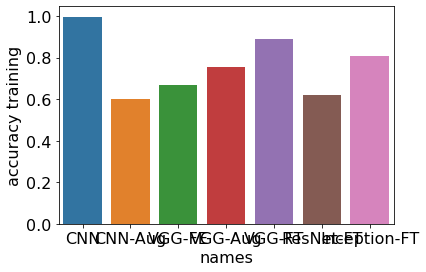

In [ ]:
import seaborn as sns
plt.rcParams.update({'font.size': 16})
sns.barplot(x="names", y="acc_tr", data=df_metrics)
plt.xlabel('names')
plt.ylabel('accuracy training')
plt.show()

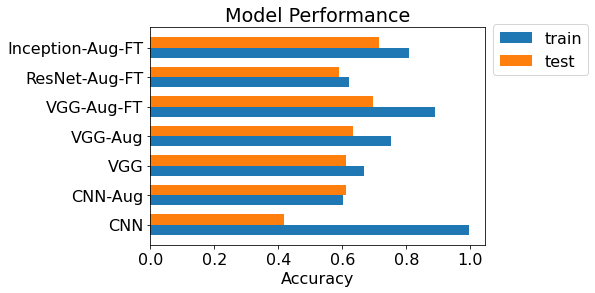

In [ ]:
import numpy as np

N = 7
#men_means = (20, 35, 30, 35, 27)
#women_means = (25, 32, 34, 20, 25)

ind = np.arange(N) 
width = 0.35       
plt.barh(ind, acc_train, width, label='train')
plt.barh(ind + width, acc_test, width,
    label='test')

#plt.ylabel('Scores')
plt.title('Model Performance')
plt.xlabel('Accuracy')
plt.yticks(ind + width / 2, ('CNN','CNN-Aug','VGG',
                             'VGG-Aug','VGG-Aug-FT','ResNet-Aug-FT','Inception-Aug-FT'))
#plt.legend(loc='best')
plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
plt.show()